In [2]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np
from model.resnet import resnet50

In [2]:
import time
import torch

if __name__ == '__main__':
    print('torch版本：'+torch.__version__)
    print('cuda是否可用：'+str(torch.cuda.is_available()))
    print('cuda版本：'+str(torch.version.cuda))
    print('cuda数量:'+str(torch.cuda.device_count()))
    print('GPU名称：'+str(torch.cuda.get_device_name()))
    print('当前设备索引：'+str(torch.cuda.current_device()))

    device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")
    print(device)
    print(torch.rand(3, 3).cuda())

    for i in range(1,100000):
        start = time.time()
        a = torch.FloatTensor(i*100,1000,1000)
        a = a.cuda() #a = a
        a = torch.matmul(a,a)
        end = time.time() - start
        print(end)


torch版本：1.7.1
cuda是否可用：True
cuda版本：10.1
cuda数量:1
GPU名称：NVIDIA GeForce RTX 3090
当前设备索引：0
cuda:0
tensor([[0.4143, 0.3753, 0.3137],
        [0.7042, 0.0692, 0.6803],
        [0.5891, 0.2678, 0.1080]], device='cuda:0')
0.17552733421325684
0.40900254249572754
0.6471912860870361
0.89324951171875
1.1323156356811523
1.3704211711883545
1.6174020767211914
1.855501413345337
2.1076767444610596
2.3554513454437256
2.579010009765625
2.812443494796753
3.0557432174682617
3.3150041103363037
3.547029495239258
3.7928225994110107
4.228062629699707
4.495520114898682
4.812321186065674
4.986769437789917


KeyboardInterrupt: 

In [4]:
print(os.environ['HOMEPATH'])

\Users\26058


In [2]:
bn = nn.BatchNorm2d(3, track_running_stats=True)
list(bn.named_parameters())

[('weight',
  Parameter containing:
  tensor([1., 1., 1.], requires_grad=True)),
 ('bias',
  Parameter containing:
  tensor([0., 0., 0.], requires_grad=True))]

In [3]:
list(bn.named_buffers())

[('running_mean', tensor([0., 0., 0.])),
 ('running_var', tensor([1., 1., 1.])),
 ('num_batches_tracked', tensor(0))]

In [4]:
bn.state_dict()

OrderedDict([('weight', tensor([1., 1., 1.])),
             ('bias', tensor([0., 0., 0.])),
             ('running_mean', tensor([0., 0., 0.])),
             ('running_var', tensor([1., 1., 1.])),
             ('num_batches_tracked', tensor(0))])

In [5]:
torch.save(bn.state_dict(), 'E:/Program-Project/re-CURL/model/pre-trained/bn.pth')
new_bn = nn.BatchNorm2d(3, track_running_stats=True)

In [6]:
old_bn = torch.load('E:/Program-Project/re-CURL/model/pre-trained/bn.pth')
old_bn

OrderedDict([('weight', tensor([1., 1., 1.])),
             ('bias', tensor([0., 0., 0.])),
             ('running_mean', tensor([0., 0., 0.])),
             ('running_var', tensor([1., 1., 1.])),
             ('num_batches_tracked', tensor(0))])

In [7]:
new_bn.load_state_dict(old_bn)

<All keys matched successfully>

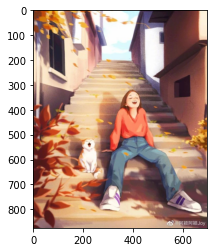

In [13]:
path = "C:\\Users\\26058\\Pictures\\Saved Pictures\\1.jpg"
img = Image.open(path)
plt.imshow(img)

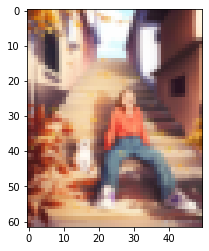

In [12]:
transform = transforms.Resize(50)
transformed_pic = transform(img)
plt.imshow(transformed_pic)

In [9]:
transformed_pic.mode

'RGB'

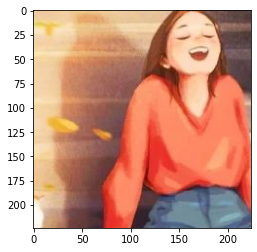

In [14]:
transform = transforms.CenterCrop(224)
transformed_pic = transform(img)
plt.imshow(transformed_pic)

In [6]:
device = torch.device('cuda:0')
model = resnet50(False, True).to(device)

In [8]:
model.layer1

Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, ke

In [10]:
for idx, m in enumerate(model.layer1.named_modules()):
    print(idx, '->', m)

0 -> ('', Sequential(
  (0): Bottleneck(
    (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (downsample): Sequential(
      (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
  )
  (1): Bottleneck(
    (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv2): Conv2d(

In [17]:
for name, module in enumerate(model.layer1.named_children()):
    print(name, '->', module)

0 -> ('0', Bottleneck(
  (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (downsample): Sequential(
    (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
))
1 -> ('1', Bottleneck(
  (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), 

In [8]:
for k, v in enumerate(model.modules()):
    print(k, '->', v)

0 -> ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride

In [1]:
import sys

In [2]:
print(sys.path)

['e:\\Program-Project\\re-CURL', 'c:\\Users\\26058\\.vscode\\extensions\\ms-toolsai.jupyter-2021.9.1101343141\\pythonFiles', 'c:\\Users\\26058\\.vscode\\extensions\\ms-toolsai.jupyter-2021.9.1101343141\\pythonFiles\\lib\\python', 'D:\\miniconda3\\envs\\pytorch1.7-single\\python38.zip', 'D:\\miniconda3\\envs\\pytorch1.7-single\\DLLs', 'D:\\miniconda3\\envs\\pytorch1.7-single\\lib', 'D:\\miniconda3\\envs\\pytorch1.7-single', '', 'D:\\miniconda3\\envs\\pytorch1.7-single\\lib\\site-packages', 'D:\\miniconda3\\envs\\pytorch1.7-single\\lib\\site-packages\\win32', 'D:\\miniconda3\\envs\\pytorch1.7-single\\lib\\site-packages\\win32\\lib', 'D:\\miniconda3\\envs\\pytorch1.7-single\\lib\\site-packages\\Pythonwin', 'D:\\miniconda3\\envs\\pytorch1.7-single\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\26058\\.ipython']


In [39]:
filenames = ['stage_0', 'stage_0_block_0', 'stage_0_block_1', 'stage_1', 'stage_1_block_0', 'stage_1_block_1', 'stage_2', 'stage_3']
filenames.sort()
print(filenames)

['stage_0', 'stage_0_block_0', 'stage_0_block_1', 'stage_1', 'stage_1_block_0', 'stage_1_block_1', 'stage_2', 'stage_3']


In [36]:
torch.set_printoptions(precision=7)
a = torch.tensor([0, 0.1736, 0.08250])
print(a)

tensor([0.0000000, 0.1736000, 0.0825000])


In [38]:
b = torch.tensor([0, 0.2975, 0.1390], dtype=torch.float64)
print(b)

tensor([0.0000000, 0.2975000, 0.1390000], dtype=torch.float64)


In [39]:
d = b * 0.6172
print(d)

tensor([0.0000000, 0.1836170, 0.0857908], dtype=torch.float64)


In [40]:
c = a - d
print(c)

tensor([ 0.0000000, -0.0100170, -0.0032908], dtype=torch.float64)


In [42]:
m = torch.tensor([-0.003291], dtype=torch.float64)
n = torch.tensor([-0.01002], dtype=torch.float64)
h = m / n
print(h)

tensor([0.3284431], dtype=torch.float64)


In [21]:
q = torch.tensor([-0.7917], dtype=torch.float64)
p = torch.tensor([-0.1084], dtype=torch.float64)
v = p - q
print(v)

tensor([0.6833000], dtype=torch.float64)


In [22]:
l = torch.tensor([-0.1113], dtype=torch.float64)
g = v / l
print(g)

tensor([-6.1392633], dtype=torch.float64)
